# Project Phase 2: Association Rule Mining
**Notebook 2 of 2**

## Team Outliers
1. Karan Dalal
2. Neil Joshi
3. Syed Kashif Kamonpuri
4. Vishal Agarwal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Online_Retail_Preprocessed_V2.csv', parse_dates=['InvoiceDate', 'InvoiceMonth'])
data['InvoiceMonth'] = data.InvoiceDate.dt.month
data.shape

(258457, 11)

In [3]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   cream hanging heart t-light holder         6   
1     536365     71053                  white metal lantern         6   
2     536365    84406B       cream cupid hearts coat hanger         8   
3     536365    84029G  knitted union flag hot water bottle         6   
4     536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   TotalSalesAmount  InvoiceMonth TimeOfDay  
0             15.30            12   Morning  
1             20.34            12   Morning  
2             22.00            12   Morning  
3             20.34            12   Morning  
4             20.34            12   Morning

In [4]:
data = data[data.Country == 'United Kingdom']
data.drop(columns=['InvoiceMonth'], inplace=True)
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   cream hanging heart t-light holder         6   
1     536365     71053                  white metal lantern         6   
2     536365    84406B       cream cupid hearts coat hanger         8   
3     536365    84029G  knitted union flag hot water bottle         6   
4     536365    84029E       red woolly hottie white heart.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   TotalSalesAmount TimeOfDay  
0             15.30   Morning  
1             20.34   Morning  
2             22.00   Morning  
3             20.34   Morning  
4             20.34   Morning

Removing unwanted columns

In [5]:
df = data.loc[:,"InvoiceNo":"Quantity"]
df.head()

InvoiceNo StockCode                          Description  Quantity
0     536365    85123A   cream hanging heart t-light holder         6
1     536365     71053                  white metal lantern         6
2     536365    84406B       cream cupid hearts coat hanger         8
3     536365    84029G  knitted union flag hot water bottle         6
4     536365    84029E       red woolly hottie white heart.         6

In [6]:
df['InvoiceNo'] = df.InvoiceNo.astype('str')
df.sort_values(by='InvoiceNo', inplace=True)
df.head()

InvoiceNo StockCode                          Description  Quantity
0    536365    85123A   cream hanging heart t-light holder         6
1    536365     71053                  white metal lantern         6
2    536365    84406B       cream cupid hearts coat hanger         8
3    536365    84029G  knitted union flag hot water bottle         6
4    536365    84029E       red woolly hottie white heart.         6

Replacing spaces with underscore '_'

In [7]:
df['Description'] = df.Description.str.replace(' ', '_')

### Creating baskets for each invoice

In [8]:
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0)\
          .set_index('InvoiceNo'))

In [9]:
basket

Description  10_colour_spaceboy_pen  12_coloured_party_balloons  \
InvoiceNo                                                         
536365                          0.0                         0.0   
536366                          0.0                         0.0   
536367                          0.0                         0.0   
536368                          0.0                         0.0   
536369                          0.0                         0.0   
...                             ...                         ...   
581582                          0.0                         0.0   
581583                          0.0                         0.0   
581584                          0.0                         0.0   
581585                          0.0                         0.0   
581586                          0.0                         0.0   

Description  12_daisy_pegs_in_wood_box  12_egg_house_painted_wood  \
InvoiceNo                                                           
536365                             0.0                        0.0   
536366                             0.0                        0.0   
536367                             0.0                        0.0   
536368                             0.0                        0.0   
536369                             0.0                        0.0   
...                                ...                        ...   
581582                             0.0                        0.0   
581583                             0.0                        0.0   
581584                             0.0                        0.0   
581585                             0.0                        0.0   
581586                             0.0                        0.0   

Description  12_hanging_eggs_hand_painted  12_ivory_rose_peg_place_settings  \
InvoiceNo                                                                     
536365                                0.0                               0.0   
536366                                0.0                               0.0   
536367                                0.0                               0.0   
536368                                0.0                               0.0   
536369                                0.0                               0.0   
...                                   ...                               ...   
581582                                0.0                               0.0   
581583                                0.0                               0.0   
581584                                0.0                               0.0   
581585                                0.0                               0.0   
581586                                0.0                               0.0   

Description  12_message_cards_with_envelopes  12_pencil_small_tube_woodland  \
InvoiceNo                                                                     
536365                                   0.0                            0.0   
536366                                   0.0                            0.0   
536367                                   0.0                            0.0   
536368                                   0.0                            0.0   
536369                                   0.0                            0.0   
...                                      ...                            ...   
581582                                   0.0                            0.0   
581583                                   0.0                            0.0   
581584                                   0.0                            0.0   
581585                                   0.0                            0.0   
581586                                   0.0                            0.0   

Description  12_pencils_small_tube_red_retrospot  12_pencils_small_tube_skull  \
InvoiceNo                                                                       
536365      

### Converting quantity for each item as 0/1

In [10]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [11]:
basket_sets

Description  10_colour_spaceboy_pen  12_coloured_party_balloons  \
InvoiceNo                                                         
536365                            0                           0   
536366                            0                           0   
536367                            0                           0   
536368                            0                           0   
536369                            0                           0   
...                             ...                         ...   
581582                            0                           0   
581583                            0                           0   
581584                            0                           0   
581585                            0                           0   
581586                            0                           0   

Description  12_daisy_pegs_in_wood_box  12_egg_house_painted_wood  \
InvoiceNo                                                           
536365                               0                          0   
536366                               0                          0   
536367                               0                          0   
536368                               0                          0   
536369                               0                          0   
...                                ...                        ...   
581582                               0                          0   
581583                               0                          0   
581584                               0                          0   
581585                               0                          0   
581586                               0                          0   

Description  12_hanging_eggs_hand_painted  12_ivory_rose_peg_place_settings  \
InvoiceNo                                                                     
536365                                  0                                 0   
536366                                  0                                 0   
536367                                  0                                 0   
536368                                  0                                 0   
536369                                  0                                 0   
...                                   ...                               ...   
581582                                  0                                 0   
581583                                  0                                 0   
581584                                  0                                 0   
581585                                  0                                 0   
581586                                  0                                 0   

Description  12_message_cards_with_envelopes  12_pencil_small_tube_woodland  \
InvoiceNo                                                                     
536365                                     0                              0   
536366                                     0                              0   
536367                                     0                              0   
536368                                     0                              0   
536369                                     0                              0   
...                                      ...                            ...   
581582                                     0                              0   
581583                                     0                              0   
581584                                     0                              0   
581585                                     0                              0   
581586                                     0                              0   

Description  12_pencils_small_tube_red_retrospot  12_pencils_small_tube_skull  \
InvoiceNo                                                                       
536365      

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Generating frequent itemsets using Apriori principle
Min. support threshold = 1%

In [13]:
sup = 0.01
frequent_itemsets = apriori(basket_sets, min_support=sup, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

support                               itemsets  length
0  0.011363  (12_pencils_small_tube_red_retrospot)       1
1  0.011673          (12_pencils_small_tube_skull)       1
2  0.028873  (3_drawer_antique_white_wood_cabinet)       1
3  0.010928   (3_hearts_hanging_decoration_rustic)       1
4  0.015834     (3_hook_photo_shelf_antique_white)       1

In [14]:
def to_String(text):
    return str(text)[10:-1]

### Creating association rules using frequent itemsets

In [15]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4, support_only=False)
rules['antecedents'] = rules.antecedents.apply(to_String)
rules['consequents'] = rules.consequents.apply(to_String)
rules.head()

antecedents  \
0   {'wood_2_drawer_cabinet_white_finish'}   
1  {'3_drawer_antique_white_wood_cabinet'}   
2          {'60_teatime_fairy_cake_cases'}   
3           {'alarm_clock_bakelike_ivory'}   
4            {'alarm_clock_bakelike_pink'}   

                               consequents  antecedent support  \
0  {'3_drawer_antique_white_wood_cabinet'}            0.024589   
1   {'wood_2_drawer_cabinet_white_finish'}            0.028873   
2      {'pack_of_72_retrospot_cake_cases'}            0.024589   
3           {'alarm_clock_bakelike_green'}            0.020801   
4           {'alarm_clock_bakelike_green'}            0.022974   

   consequent support   support  confidence       lift  leverage  conviction  
0            0.028873  0.013536    0.550505  19.066417  0.012826    2.160485  
1            0.024589  0.013536    0.468817  19.066417  0.012826    1.836301  
2            0.037752  0.010990    0.446970  11.839551  0.010062    1.739955  
3            0.034834  0.011860    0.570149  16.367654  0.011135    2.245352  
4            0.034834  0.012853    0.559459  16.060775  0.012053    2.190868

In [16]:
print(rules.shape)
rules['support_perc'] = rules.support/basket_sets.shape[0]
rules['Rule'] = rules.antecedents + " => " + rules.consequents
rules.head()

(208, 9)


antecedents  \
0   {'wood_2_drawer_cabinet_white_finish'}   
1  {'3_drawer_antique_white_wood_cabinet'}   
2          {'60_teatime_fairy_cake_cases'}   
3           {'alarm_clock_bakelike_ivory'}   
4            {'alarm_clock_bakelike_pink'}   

                               consequents  antecedent support  \
0  {'3_drawer_antique_white_wood_cabinet'}            0.024589   
1   {'wood_2_drawer_cabinet_white_finish'}            0.028873   
2      {'pack_of_72_retrospot_cake_cases'}            0.024589   
3           {'alarm_clock_bakelike_green'}            0.020801   
4           {'alarm_clock_bakelike_green'}            0.022974   

   consequent support   support  confidence       lift  leverage  conviction  \
0            0.028873  0.013536    0.550505  19.066417  0.012826    2.160485   
1            0.024589  0.013536    0.468817  19.066417  0.012826    1.836301   
2            0.037752  0.010990    0.446970  11.839551  0.010062    1.739955   
3            0.034834  0.011860    0.570149  16.367654  0.011135    2.245352   
4            0.034834  0.012853    0.559459  16.060775  0.012053    2.190868   

   support_perc                                               Rule  
0  8.404948e-07  {'wood_2_drawer_cabinet_white_finish'} => {'3_...  
1  8.404948e-07  {'3_drawer_antique_white_wood_cabinet'} => {'w...  
2  6.824201e-07  {'60_teatime_fairy_cake_cases'} => {'pack_of_7...  
3  7.363968e-07  {'alarm_clock_bakelike_ivory'} => {'alarm_cloc...  
4  7.980845e-07  {'alarm_clock_bakelike_pink'} => {'alarm_clock...

### Rules having multiple itemsets in antecedents/consequents

In [17]:
rules[(rules.antecedents.str.contains(',')) | (rules.consequents.str.contains(','))].head()

antecedents  \
136  {'green_regency_teacup_and_saucer', 'regency_c...   
137  {'green_regency_teacup_and_saucer', 'pink_rege...   
138  {'regency_cakestand_3_tier', 'pink_regency_tea...   
139                 {'pink_regency_teacup_and_saucer'}   
140  {'green_regency_teacup_and_saucer', 'pink_rege...   

                                           consequents  antecedent support  \
136                 {'pink_regency_teacup_and_saucer'}            0.016392   
137                       {'regency_cakestand_3_tier'}            0.021360   
138                {'green_regency_teacup_and_saucer'}            0.013412   
139  {'green_regency_teacup_and_saucer', 'regency_c...            0.026700   
140               {'roses_regency_teacup_and_saucer_'}            0.021360   

     consequent support   support  confidence       lift  leverage  \
136            0.026700  0.011673    0.712121  26.671424  0.011236   
137            0.075567  0.011673    0.546512   7.232186  0.010059   
138            0.033406  0.011673    0.870370  26.054489  0.011225   
139            0.016392  0.011673    0.437209  26.671424  0.011236   
140            0.036697  0.017821    0.834302  22.735091  0.017037   

     conviction  support_perc  \
136    3.380938  7.248304e-07   
137    2.038494  7.248304e-07   
138    7.456584  7.248304e-07   
139    1.747732  7.248304e-07   
140    5.813620  1.106523e-06   

                                                  Rule  
136  {'green_regency_teacup_and_saucer', 'regency_c...  
137  {'green_regency_teacup_and_saucer', 'pink_rege...  
138  {'regency_cakestand_3_tier', 'pink_regency_tea...  
139  {'pink_regency_teacup_and_saucer'} => {'green_...  
140  {'green_regency_teacup_and_saucer', 'pink_rege...

### Confidence vs Support graph

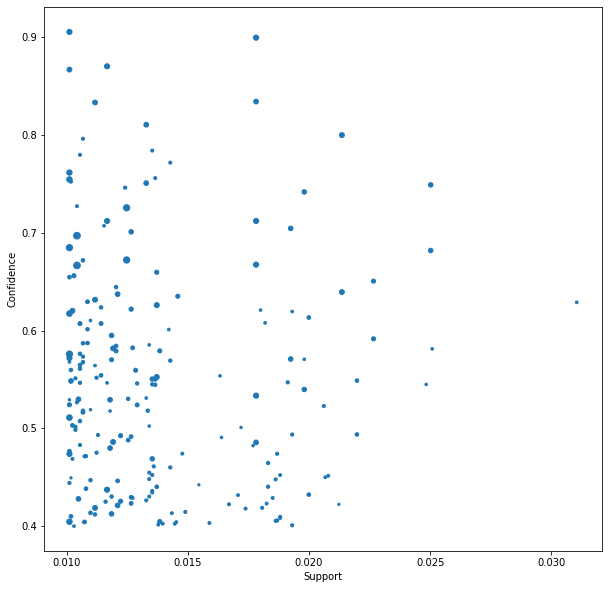

In [18]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(rules.support, rules.confidence, rules.lift)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### Visualizing association rules using network graphs

{'r': Text(0.9691653491394044, 0.008982200515425143, 'r'),
 '0': Text(0.7868386529967151, -0.4912719496760595, '0'),
 '{': Text(0.9088304737078057, -0.12118514575447695, '{'),
 'r0': Text(-0.6157690649267387, -0.6052365967823643, 'r0'),
 "'": Text(0.7945057823156947, -0.6055955269617928, "'"),
 'w': Text(-0.9359483074388141, 0.210064615454909, 'w'),
 'o': Text(-0.7432921573120079, 0.6751045852120339, 'o'),
 'd': Text(0.33345339356131365, 1.0060732379348043, 'd'),
 '_': Text(-0.3858732639311692, 0.9842438574719599, '_'),
 '2': Text(-0.11415455250475937, 0.9879058041184698, '2'),
 'a': Text(0.9549945765659986, -0.24082856496230792, 'a'),
 'e': Text(-0.3464300495428559, -0.8474797524722286, 'e'),
 'c': Text(0.16123264165705734, 1.0114063034764817, 'c'),
 'b': Text(0.910677837307492, 0.4019478560787567, 'b'),
 'i': Text(-0.8098178158985934, -0.579816645870624, 'i'),
 'n': Text(-0.23473623601311805, 1.0633578165203115, 'n'),
 't': Text(0.6416986504919862, -0.686454870651154, 't'),
 'h': Tex

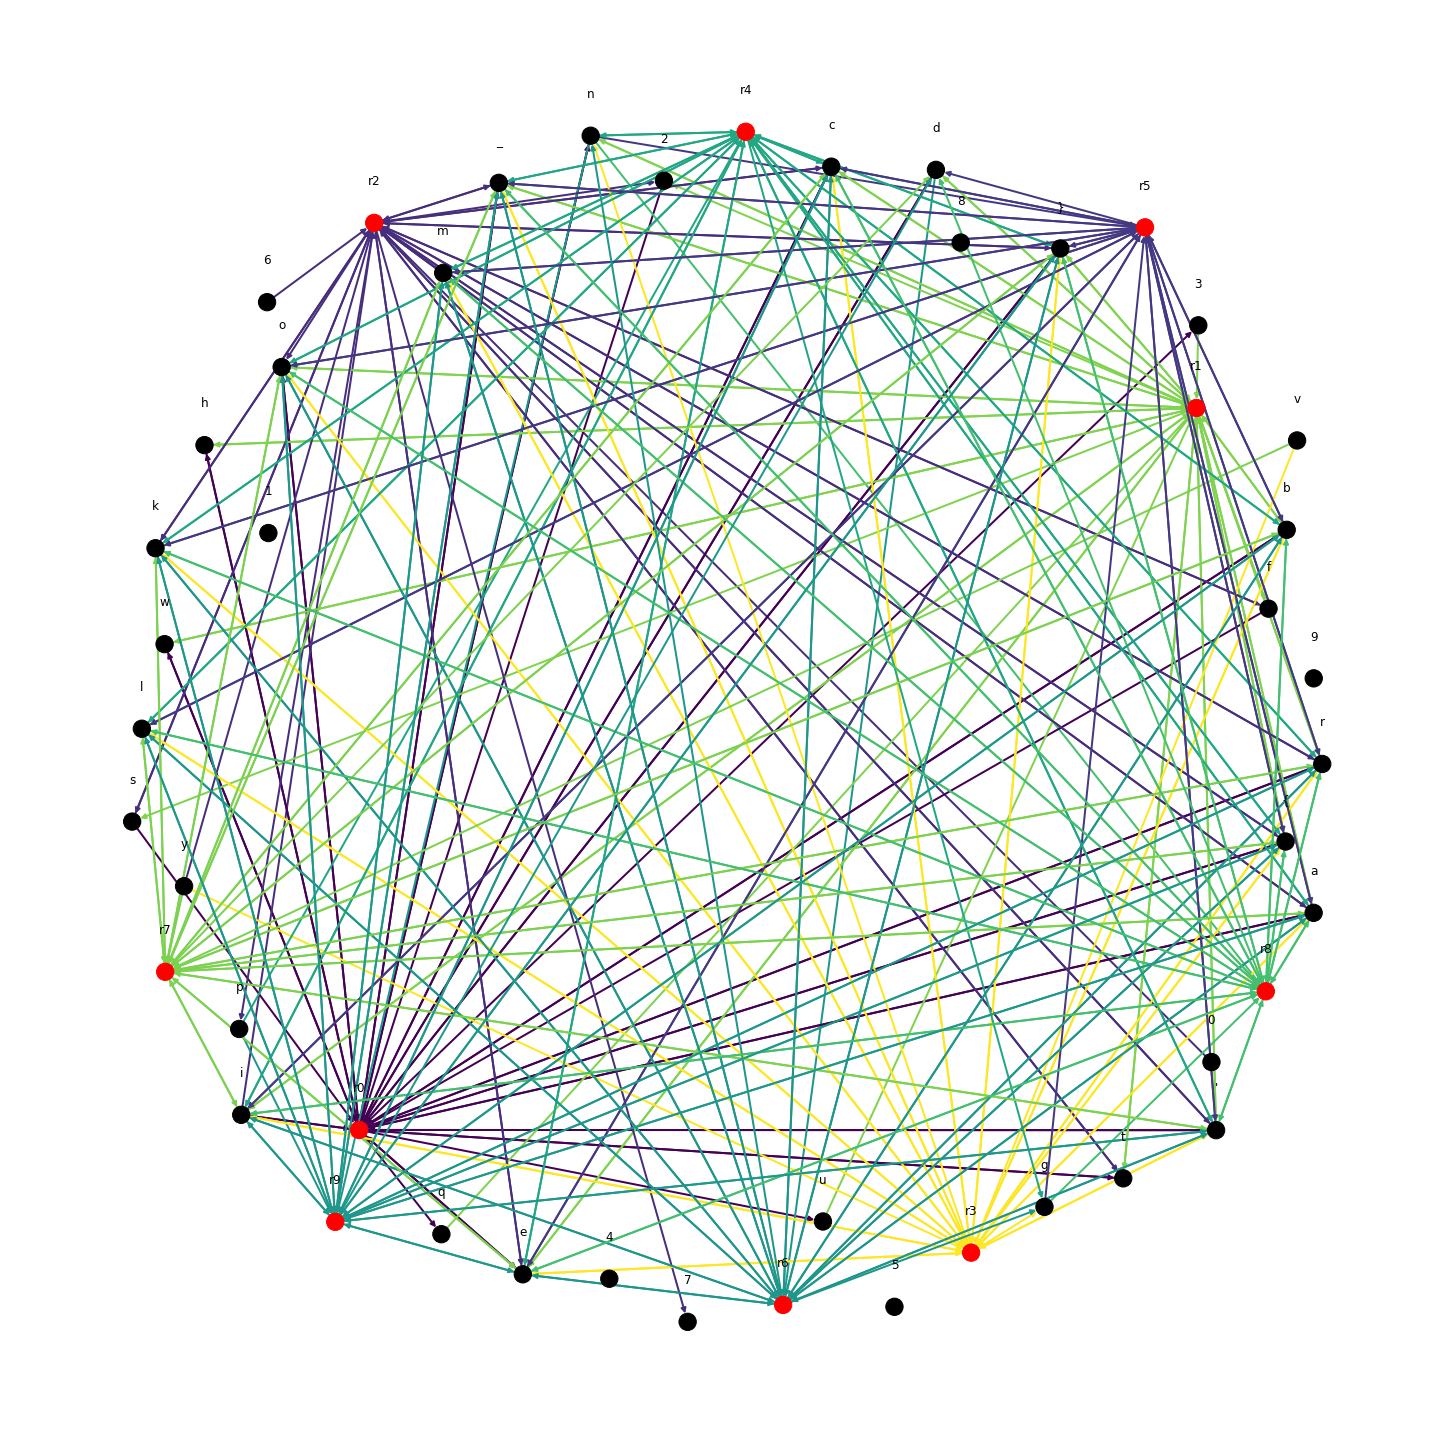

In [19]:
import networkx as nx
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, edges = edges, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)

### Rules with high lift value

In [20]:
rules.sort_values(by='lift', ascending=False, inplace=True)
rules.head()

antecedents  \
13           {'pink_happy_birthday_bunting'}   
12           {'blue_happy_birthday_bunting'}   
135   {'wooden_star_christmas_scandinavian'}   
134  {'wooden_heart_christmas_scandinavian'}   
29     {'feltcraft_princess_charlotte_doll'}   

                                 consequents  antecedent support  \
13           {'blue_happy_birthday_bunting'}            0.015647   
12           {'pink_happy_birthday_bunting'}            0.014964   
135  {'wooden_heart_christmas_scandinavian'}            0.017200   
134   {'wooden_star_christmas_scandinavian'}            0.018566   
29          {'feltcraft_princess_lola_doll'}            0.017572   

     consequent support   support  confidence       lift  leverage  \
13             0.014964  0.010432    0.666667  44.550484  0.010197   
12             0.015647  0.010432    0.697095  44.550484  0.010197   
135            0.018566  0.012481    0.725632  39.084614  0.012161   
134            0.017200  0.012481    0.672241  39.084614  0.012161   
29             0.014778  0.010121    0.575972  38.974894  0.009861   

     conviction  support_perc  \
13     2.955107  6.477208e-07   
12     3.249712  6.477208e-07   
135    3.577070  7.749516e-07   
134    2.998544  7.749516e-07   
29     2.323482  6.284434e-07   

                                                  Rule  
13   {'pink_happy_birthday_bunting'} => {'blue_happ...  
12   {'blue_happy_birthday_bunting'} => {'pink_happ...  
135  {'wooden_star_christmas_scandinavian'} => {'wo...  
134  {'wooden_heart_christmas_scandinavian'} => {'w...  
29   {'feltcraft_princess_charlotte_doll'} => {'fel...

### Rules with high support

In [21]:
rules.sort_values(by='support', ascending=False).head()

antecedents  \
61            {'jumbo_bag_pink_polkadot'}   
80             {'jumbo_storage_bag_suki'}   
37   {'roses_regency_teacup_and_saucer_'}   
36    {'green_regency_teacup_and_saucer'}   
78  {'jumbo_shopper_vintage_red_paisley'}   

                             consequents  antecedent support  \
61           {'jumbo_bag_red_retrospot'}            0.049364   
80           {'jumbo_bag_red_retrospot'}            0.043154   
37   {'green_regency_teacup_and_saucer'}            0.036697   
36  {'roses_regency_teacup_and_saucer_'}            0.033406   
78           {'jumbo_bag_red_retrospot'}            0.045576   

    consequent support   support  confidence       lift  leverage  conviction  \
61            0.083452  0.031046    0.628931   7.536407  0.026927    2.470018   
80            0.083452  0.025085    0.581295   6.965592  0.021484    2.189006   
37            0.033406  0.025023    0.681895  20.412492  0.023797    3.038602   
36            0.036697  0.025023    0.749071  20.412492  0.023797    3.838942   
78            0.083452  0.024837    0.544959   6.530184  0.021034    2.014210   

    support_perc                                               Rule  
61      0.000002  {'jumbo_bag_pink_polkadot'} => {'jumbo_bag_red...  
80      0.000002  {'jumbo_storage_bag_suki'} => {'jumbo_bag_red_...  
37      0.000002  {'roses_regency_teacup_and_saucer_'} => {'gree...  
36      0.000002  {'green_regency_teacup_and_saucer'} => {'roses...  
78      0.000002  {'jumbo_shopper_vintage_red_paisley'} => {'jum...

### Rules with high confidence

In [22]:
rules.sort_values(by='confidence', ascending=True).head()

antecedents  \
116   {'lunch_bag_vintage_leaf_design'}   
43            {'heart_of_wicker_small'}   
51                 {'jumbo_bag_apples'}   
100          {'lunch_bag_apple_design'}   
49   {'jumbo__bag_baroque_black_white'}   

                               consequents  antecedent support  \
116            {'lunch_bag_red_retrospot'}            0.025768   
43               {'heart_of_wicker_large'}            0.048184   
51           {'jumbo_bag_doiley_patterns'}            0.034337   
100            {'lunch_bag_suki__design_'}            0.035952   
49   {'jumbo_shopper_vintage_red_paisley'}            0.034710   

     consequent support   support  confidence       lift  leverage  \
116            0.054704  0.010307    0.400000   7.312145  0.008898   
43             0.039118  0.019311    0.400773  10.245162  0.017426   
51             0.050295  0.013785    0.401447   7.981850  0.012058   
100            0.045948  0.014468    0.402418   8.758029  0.012816   
49             0.045576  0.013971    0.402504   8.831518  0.012389   

     conviction  support_perc  \
116    1.575494  6.400098e-07   
43     1.603536  1.199055e-06   
51     1.586667  8.559167e-07   
100    1.596520  8.983270e-07   
49     1.597374  8.674832e-07   

                                                  Rule  
116  {'lunch_bag_vintage_leaf_design'} => {'lunch_b...  
43   {'heart_of_wicker_small'} => {'heart_of_wicker...  
51   {'jumbo_bag_apples'} => {'jumbo_bag_doiley_pat...  
100  {'lunch_bag_apple_design'} => {'lunch_bag_suki...  
49   {'jumbo__bag_baroque_black_white'} => {'jumbo_...

### Rules with low confidence

In [23]:
rules.sort_values(by='confidence', ascending=True).head()

antecedents  \
116   {'lunch_bag_vintage_leaf_design'}   
43            {'heart_of_wicker_small'}   
51                 {'jumbo_bag_apples'}   
100          {'lunch_bag_apple_design'}   
49   {'jumbo__bag_baroque_black_white'}   

                               consequents  antecedent support  \
116            {'lunch_bag_red_retrospot'}            0.025768   
43               {'heart_of_wicker_large'}            0.048184   
51           {'jumbo_bag_doiley_patterns'}            0.034337   
100            {'lunch_bag_suki__design_'}            0.035952   
49   {'jumbo_shopper_vintage_red_paisley'}            0.034710   

     consequent support   support  confidence       lift  leverage  \
116            0.054704  0.010307    0.400000   7.312145  0.008898   
43             0.039118  0.019311    0.400773  10.245162  0.017426   
51             0.050295  0.013785    0.401447   7.981850  0.012058   
100            0.045948  0.014468    0.402418   8.758029  0.012816   
49             0.045576  0.013971    0.402504   8.831518  0.012389   

     conviction  support_perc  \
116    1.575494  6.400098e-07   
43     1.603536  1.199055e-06   
51     1.586667  8.559167e-07   
100    1.596520  8.983270e-07   
49     1.597374  8.674832e-07   

                                                  Rule  
116  {'lunch_bag_vintage_leaf_design'} => {'lunch_b...  
43   {'heart_of_wicker_small'} => {'heart_of_wicker...  
51   {'jumbo_bag_apples'} => {'jumbo_bag_doiley_pat...  
100  {'lunch_bag_apple_design'} => {'lunch_bag_suki...  
49   {'jumbo__bag_baroque_black_white'} => {'jumbo_...

### Visualizing few rows with varying values for support and condifence

In [24]:
selected = rules.loc[[51, 100, 202, 23, 200, 34, 36, 141, 137, 131, 78, 132, 36], ]
selected.head()

antecedents  \
51                                {'jumbo_bag_apples'}   
100                         {'lunch_bag_apple_design'}   
202  {'green_regency_teacup_and_saucer', 'regency_c...   
23                 {'hand_over_the_chocolate___sign_'}   
200  {'green_regency_teacup_and_saucer', 'pink_rege...   

                                           consequents  antecedent support  \
51                       {'jumbo_bag_doiley_patterns'}            0.034337   
100                        {'lunch_bag_suki__design_'}            0.035952   
202  {'pink_regency_teacup_and_saucer', 'roses_rege...            0.016392   
23                      {'cook_with_wine_metal_sign_'}            0.026576   
200                       {'regency_cakestand_3_tier'}            0.017821   

     consequent support   support  confidence       lift  leverage  \
51             0.050295  0.013785    0.401447   7.981850  0.012058   
100            0.045948  0.014468    0.402418   8.758029  0.012816   
202            0.019808  0.010121    0.617424  31.171214  0.009796   
23             0.027134  0.010742    0.404206  14.896410  0.010021   
200            0.075567  0.010121    0.567944   7.515811  0.008774   

     conviction  support_perc  \
51     1.586667  8.559167e-07   
100    1.596520  8.983270e-07   
202    2.562087  6.284434e-07   
23     1.632888  6.669982e-07   
200    2.139616  6.284434e-07   

                                                  Rule  
51   {'jumbo_bag_apples'} => {'jumbo_bag_doiley_pat...  
100  {'lunch_bag_apple_design'} => {'lunch_bag_suki...  
202  {'green_regency_teacup_and_saucer', 'regency_c...  
23   {'hand_over_the_chocolate___sign_'} => {'cook_...  
200  {'green_regency_teacup_and_saucer', 'pink_rege...

### Interactive confidence vs support graph

In [26]:
import plotly.express as px

fig = px.scatter(selected, x="support", y="confidence",\
                 size="lift", hover_name="Rule", log_x=True, size_max=30, color='lift')
fig.show()

### Exporting rules as CSV

In [27]:
rules.to_csv('rules.csv', index=False)